In [11]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.sparse import coo_matrix, hstack

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
class Model_Implementation():
    def Model(self,data_in_form_of_dataframe,model_name):
        data=data_in_form_of_dataframe
        data.target.value_counts().plot(kind='bar')# ploting barchart to check target values.
        data.target.value_counts()
        data.columns
        data=shuffle(data)
        data=data.reset_index().drop(['index'],1)
        target=data.target
        counter_object=CountVectorizer()# text conversion into vector form by using CountVectorizer
        tfidf_object=TfidfVectorizer()  #text conversion into vector form by using TfidfVectorizer
        def remove_x_char_from_data(data_in_form_of_dataframe):# removing 'x' from dataset
            data=data_in_form_of_dataframe
            for i in range(len(data)):
                data.merged_data[i]=data.merged_data[i].replace('x','')
#                 data.merge_data_2[i]=data.merge_data_2[i].replace('x','')
                return data
        data=remove_x_char_from_data(data)
        for i in range(len(data)):
                data.merged_data[i]=data.merged_data[i].lower()
                data.merge_data_2[i]=data.merge_data_2[i].lower()
                
        tfidf_vectorizer = TfidfVectorizer(max_df=0.95)
        tf_train_data = pd.concat([data['merged_data'], data['merge_data_2']])# concate merged data(City,address,passcode)
        #merged_data merged in the form of (City + Address + passcode(zipcode))
        # merge_data_2 and merged_data having similar and non similar data,but both are merged in (City + address +passcode)
        trained_tf_idf_transformer = tfidf_vectorizer.fit_transform(tf_train_data)
        Vectorized_transform_Data_of_merged_data = tfidf_vectorizer.transform(data['merged_data'])
        Vectorized_transform_Data_of_merge_data_2 = tfidf_vectorizer.transform(data['merge_data_2'])
        X= hstack([Vectorized_transform_Data_of_merged_data,Vectorized_transform_Data_of_merge_data_2])
        Y = data['target'].values
#         cv = KFold(n_splits=10, random_state=1, shuffle=True)
        
      
#         scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#         # report performance
#         print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
        
        
#         from sklearn.model_selection import StratifiedKFold
#         skf = StratifiedKFold(n_splits=5, random_state=None)
        
#         for train_index, test_index in skf.split(X,Y): 
#             print("Train:", train_index, "Validation:", test_index) 
#             X_train, X_test = X[train_index], X[test_index] 
#             y_train, y_test = y[train_index], y[test_index]


                             # Not working Kfold in SVC taking so much time (more then 1 hours)
        # with Kfold model gives 99% accuracy
        seed = 123
        np.random.seed(seed)
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=seed)
        model=model_name
        model.fit(x_train, y_train)
        
        pred_tfidf=model.predict(x_test)
        
        return round(accuracy_score(y_test,pred_tfidf),2)
     








In [35]:
data=pd.read_excel("data_completed_4.xlsx")



In [36]:
data

,Unnamed: 0,Address,City,Post Code,Merged Stops,merged_data,merge_data_2,target
0,0,xxxxxxxxxxxxxxxJA BUSINESS UNIT,LOHJA,8150,1,xxxxxxxxxxxxxxxJA BUSINESS UNIT LOHJA 8150,xxxxxxxxxxxxxxxJA BUSINESS UNIT LOHJA 8150,1
1,1,xxxxxxxxxxxxaaherrantie 2,JYVÄSKYLÄ,40100,24,xxxxxxxxxxxxaaherrantie 2 JYVÄSKYLÄ 40100,xxxxxxxxxSITUULI 12 ESPOO 2100,0
2,2,xxxxxxxxxxxxxxxxxpelinintie 1 2.Krs,Kempele,90450,15,xxxxxxxxxxxxxxxxxpelinintie 1 2.Krs Kempele 90450,xxxxxxxxxxxxxxxxxxksanterinkatu 18-20 Lahti 15140,0
3,3,xxxxxxxxxxxxxxxxxxx Porvoon Kirjakeskus,PORVOO,6150,21,xxxxxxxxxxxxxxxxxxx Porvoon Kirjakeskus PORVOO...,xxxxxxxxxxxxxxxLANNINKATU 11-13 HELSINKI 930,0
4,4,xxxxxxxxxTAKATU 2-4,KOKKOLA,67100,24,xxxxxxxxxTAKATU 2-4 KOKKOLA 67100,xxxxxxxxxxxxxxxxxx.VIRTANEN INSTITUTE KUOPIO 7...,0
...,...,...,...,...,...,...,...,...
178576,178576,xxxxxxxxxxxSITIE 8 LEVI,SIRKKA,99130,5,xxxxxxxxxxxSITIE 8 LEVI SIRKKA 99130,xxxxxxxxxxxSITIE 8 LEVI SIRKKA 99130,1
178577,178577,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22,LAHTI,15140,2,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 LAHTI 15140,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 LAHTI 15140,1
178578,178578,xxxxxxxxxxxxxxxxxERTINKATU 16 5 KRS,OULU,90100,8,xxxxxxxxxxxxxxxxxERTINKATU 16 5 KRS OULU 90100,xxxxxxxxxxxMIKATU 31-33 OULU 90100,1
178579,178579,xxxxxxxxxxxjauksentie 2,Riihimaki 11100,11100,2,xxxxxxxxxxxjauksentie 2 Riihimaki 11100 11100,xxxxxxxxxxxJAUKSENTIE 2 RIIHIMÄKI 11120,1


0.72

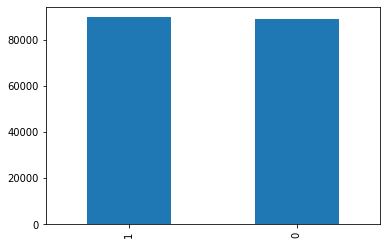

In [12]:
dataclass_obj=Model_Implementation()
naive_object=MultinomialNB()
#svc_model=SVC()
# decision_tree=DecisionTreeClassifier()
# random_forest=RandomForestClassifier()
# logistic_obj=LogisticRegression()
#naive_accuracy=dataclass_obj.Model(data,nai)
dataclass_obj.Model(data,naive_object)
#svc_model_acc=dataclass_obj.Model(data,svc_model)
# decision_tree_acc=dataclass_obj.Model(data,decision_tree)

# random_forest_acc=dataclass_obj.Model(data,random_forest)
#print("Model_accuracies are :",Logistic_acc)


In [13]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
#naive_accuracy=dataclass_obj.Model(data,naive_object)
Logistic_acc=dataclass_obj.Model(data,random_forest)
#svc_model_acc=dataclass_obj.Model(data,svc_model)
# decision_tree_acc=dataclass_obj.Model(data,decision_tree)

# random_forest_acc=dataclass_obj.Model(data,random_forest)
print("Model_accuracies are :",Logistic_acc)


In [28]:
import pandas as pd
data=pd.read_excel('246889360_task_number.xlsx')

In [32]:
data['target']=np.nan

In [33]:
data

,Unnamed: 0,Transport Task,Shipment Number,Name,Address,City,Post Code,Merged Stops,Stop Number Without Merge,target
0,17046,246889360,xxxxxxxxxxxxx7886,xxxxxxxxxxxxxxxxxxxotti,xxxxxxxxxxxxxanderinkatu 18,HANKO,10900,22,23,NaN
1,17047,246889360,xxxxxxxxxxxxx7695,xxxxxxxxxxxxxxxxxxxotti,xxxxxxxxxxxxxanderinkatu 18,HANKO,10900,22,23,NaN
2,17048,246889360,xxxxxxxxxxxxx8173,xxxxxxxxxxxxxxxxxxxotti,xxxxxxxxxxxxxanderinkatu 18,HANKO,10900,22,23,NaN
3,17049,246889360,xxxxxxxxxxxxx3627,xxxxxxxxxxxEKKI,xxxxxxxxxxxxxANDERINKATU 18,HANKO,10900,22,22,NaN
4,17050,246889360,xxxxxxxxxxxxx4597,xxxxxxxxxxxEKKI,xxxxxxxxxxxxxANDERINKATU 18,HANKO,10900,22,22,NaN
5,17051,246889360,xxxxxxxxxxxxx4832,xxxxxxxxxxxEKKI,xxxxxxxxxxxxxANDERINKATU 18,HANKO,10900,22,22,NaN
6,17052,246889360,xxxxxxxxxxxxx4917,xxxxxxxxxxxxxxxxxxxxxEKKI,xxxxxxMATIE 6,TAMMISAARI,10600,19,21,NaN
7,17053,246889360,xxxxxxxxxxxxx9614,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxekki,xxxxxxmatie 6,Tammisaari,10600,19,20,NaN
8,17054,246889360,xxxxxxxxxxxxx4686,xxxxxxxxxxxxxxxxxxxxxEKKI,xxxxxxMATIE 6,TAMMISAARI,10600,19,21,NaN
9,17055,246889360,xxxxxxxxxxxxx3610,xxxxxxxxxxxxxxxxxxxxxEKKI,xxxxxxMATIE 6,TAMMISAARI,10600,19,21,NaN


In [31]:
for i in range(len(data)-1):
    if data['Merged Stops'][i]==data['Merged Stops'][i+1]:
        print(data['Merged Stops'][i],data['Merged Stops'][i+1])
        

22 22
22 22
22 22
22 22
22 22
19 19
19 19
19 19
19 19
19 19
16 16
16 16
16 16
14 14
14 14
11 11
11 11
7 7
7 7
7 7
7 7
4 4
4 4
1 1
1 1
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24


In [25]:
data['Merged Stops'][0]==data['Merged Stops'][1]

True

In [20]:
data

,Unnamed: 0,Transport Task,Shipment Number,Name,Address,City,Post Code,Merged Stops,Stop Number Without Merge,target
0,17046,246889360,xxxxxxxxxxxxx7886,xxxxxxxxxxxxxxxxxxxotti,xxxxxxxxxxxxxanderinkatu 18,HANKO,10900,22,23,0
1,17047,246889360,xxxxxxxxxxxxx7695,xxxxxxxxxxxxxxxxxxxotti,xxxxxxxxxxxxxanderinkatu 18,HANKO,10900,22,23,0
2,17048,246889360,xxxxxxxxxxxxx8173,xxxxxxxxxxxxxxxxxxxotti,xxxxxxxxxxxxxanderinkatu 18,HANKO,10900,22,23,0
3,17049,246889360,xxxxxxxxxxxxx3627,xxxxxxxxxxxEKKI,xxxxxxxxxxxxxANDERINKATU 18,HANKO,10900,22,22,0
4,17050,246889360,xxxxxxxxxxxxx4597,xxxxxxxxxxxEKKI,xxxxxxxxxxxxxANDERINKATU 18,HANKO,10900,22,22,0
5,17051,246889360,xxxxxxxxxxxxx4832,xxxxxxxxxxxEKKI,xxxxxxxxxxxxxANDERINKATU 18,HANKO,10900,22,22,0
6,17052,246889360,xxxxxxxxxxxxx4917,xxxxxxxxxxxxxxxxxxxxxEKKI,xxxxxxMATIE 6,TAMMISAARI,10600,19,21,0
7,17053,246889360,xxxxxxxxxxxxx9614,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxekki,xxxxxxmatie 6,Tammisaari,10600,19,20,0
8,17054,246889360,xxxxxxxxxxxxx4686,xxxxxxxxxxxxxxxxxxxxxEKKI,xxxxxxMATIE 6,TAMMISAARI,10600,19,21,0
9,17055,246889360,xxxxxxxxxxxxx3610,xxxxxxxxxxxxxxxxxxxxxEKKI,xxxxxxMATIE 6,TAMMISAARI,10600,19,21,0


In [ ]:
trained_tf_idf_transformer

In [ ]:
with open("transformer.pkl",'rb') as file:
    pkl_m=pickle.load(file)

In [ ]:
pkl_m

In [ ]:
with open("file.pkl","wb") as f:
    pickle.dump(tfidf_vectorizer,f)